# Réseau de Neurones Convolutif avec Keras
Reconnaissance des digits de la base MNIST

## Acquisition des données

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X = mnist.data
y = mnist.target

## Séparation des données en données de test et d'entrainement

In [4]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Text(0.5, 1.0, 'Classe 5')

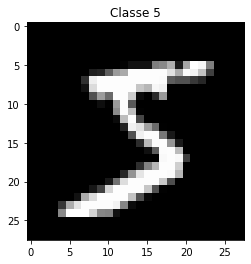

In [5]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray', interpolation='none')
plt.title("Classe {}".format(y_train[0]))

## Normalisation des valeurs des pixels
La valeur de chaque pixel doit être située entre 0 et 1

In [6]:
print("avant transformation >>  pixel (20,15) :", X_train[0].reshape(28,28)[20,15], 
      "| pixel (5,16) :", X_train[0].reshape(28,28)[5,16])

avant transformation >>  pixel (20,15) : 253.0 | pixel (5,16) : 126.0


In [7]:
X_train, X_test = X_train / 255, X_test / 255

In [8]:
print("après transformation >>  pixel (20,15) :", X_train[0].reshape(28,28)[20,15], 
      "| pixel (5,16) :", X_train[0].reshape(28,28)[5,16])

après transformation >>  pixel (20,15) : 0.9921568627450981 | pixel (5,16) : 0.49411764705882355


## Vérification des données

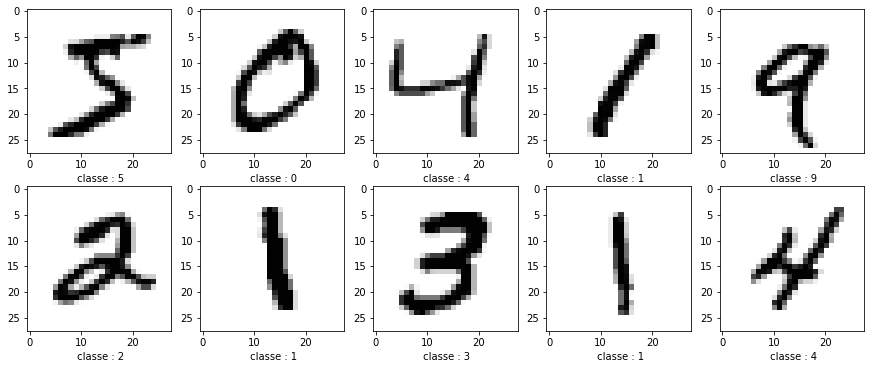

In [9]:
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(" classe : {}".format(y_train[i]))
plt.show()


## Création de la base convolutive
Dans cette partie, nous allons apprendre à un CNN à classifier les 10 classes (les chiffres de 0 à 9) de la base de données MNIST.<br>
Le modèle `Sequential` est le plus simple à construire avec Keras. Il permet de construire un modèle couche par couche.

In [10]:
#implémentation du modèle séquentiel
model = models.Sequential()

On va ajouter deux couches de convolution `Conv2D` et une couche dense activée par `Softmax`. <br>Softmax fait attribuer à chaque sortie une "note" entre 0 et 1, ainsi les sorties peuvent être interprétées comme des probabilités. La modèle base ensuite sa prédiction sur l'option qui a la plus grande probabilité. <br>
Entre les couches de convulution et la couche dense, on doit introduire une couche `Flatten`qui fait la liaison entre les précédentes.

`Kernel size` est la taille de la matrice de filtre pour la convolution (ici, on aura une matrice de filtre de 3x3).

In [11]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
# on redimensionne les X pour qu'ils puissent être passés en argument input_shape de Conv2D.
# conv2D travaille avec des images qui ont une hauteur, une largeur et un shema de couleur (1 pour greyscale, 3 pour RGB)

In [12]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax')) # couche de sortie taille 10 pour correspondre à Y

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


## Compilation et entraînement du modèle

### Encodage de la target
Il faut que y ait la même forme que la sortie (10). On va convertir y_train et y_test en matrices one-hot.

In [14]:
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

In [15]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


### Compilation
La compilation du modèle prend 3 paramètres : optimizer, loss et metrics.

* L'optimizer contrôle le Learning Rate. `adam` est un optimizer qui fonctionne dans beaucoup de cas. Il ajuste le Learning rate au cours de l'entraînement du modèle.
* L'utilisation de `categorical_crossentropy` est la plus courante pour les problèmes de classification. Un score faible indique un modèle qui fonctionne mieux.
* Pour rendre les résultats plus lisibles, on utilise `accuracy` comme valeur de metrics pour afficher l'accuracy score calculé sur le set de validation pendant qu'on entraîne le modèle.

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Entraînement

Pour entraîner le modèle, on utilise la fonction `fit()` avec les features (X_train), la target (Y_train), les données de validation (X_test et Y_test) et le nombre d'epochs.

Le nombre d'epochs est le nombre cycles que va faire le modèles dnas la data. Plus on augmente le nombre d'epochs, plus le modèle va s'améliorer, jusqu'à un certain point.

In [17]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 150s 79ms/step - loss: 0.2657 - accuracy: 0.9193 - val_loss: 0.0492 - val_accuracy: 0.9838
Epoch 2/3
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0445 - val_accuracy: 0.9859
Epoch 3/3
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0500 - val_accuracy: 0.9858


Après 3 epochs, on obtient une accuracy de 99%. Le modèle semble donc adapté et prêt à réaliser des prédictions.

## Prédictions

la fonction `predict()` revoie un vecteur de 10 valeurs. Ces valeurs correspondent à la probabilité que l'image représente chacun des digits (dnas l'ordre de 0 à 9).

#### Visualisation : prédiction sur les 10 premières valeurs du test-set

Prédiction sur les images 0 à 9 :

In [18]:
a = model.predict(X_test[:10])

In [19]:
for i in range(10) :
    print("image n°", i, ":", a[i].round(2))

image n° 0 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
image n° 1 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
image n° 2 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
image n° 3 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
image n° 4 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
image n° 5 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
image n° 6 : [0.   0.   0.   0.   0.96 0.   0.   0.   0.04 0.  ]
image n° 7 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
image n° 8 : [0.   0.   0.   0.   0.   0.88 0.12 0.   0.   0.  ]
image n° 9 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Text(0, 0.5, 'images n°')

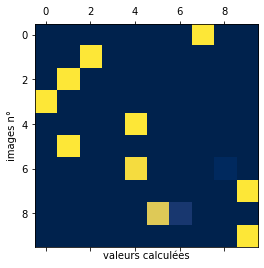

In [20]:
plt.figure(figsize=(8,4))
plt.matshow(a,cmap=plt.cm.cividis, fignum=1)
plt.xlabel("valeurs calculées")
plt.ylabel("images n°")

Le modèle semble avoir déterminé sans "hésitations" la classe d'appartenance des images 0 à 7 (respectivement 7, 2, 1, 0, 4, 1, 4, 9)<br>
Les probabilités d'appartenance à la classe majoritaire sont moins franches pour les deux derniers digits : pour l'image n°9, 97% des votes ont été en faveur du 9 et quand même 3% pour le 4. Pour l'image n°8, l'image est déterminée comme étant un 5, mais avec seulement 85% de probabilités, tandis que 14% des votes vont au 6, et 1% au 8.

Visualisons ces images pour vérifier les prédictions  :

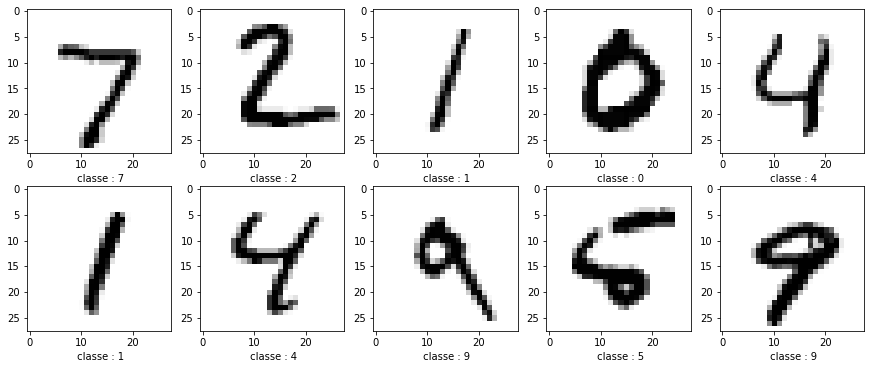

In [21]:
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(" classe : {}".format(y_test[i]))
plt.show()

Les prédictions sont donc justes pour ces 10 premières données.

#### Prédiction et scoring sur l'ensemble du test-set

In [22]:
Y_pred = model.predict(X_test)

In [23]:

y_pred = np.where(Y_test == np.max(Y_test))[1]

In [24]:
y_pred.shape

(10000,)

In [25]:
y_test = y_test.astype('int64')

In [26]:
y_test.shape

(10000,)

In [27]:
from sklearn.metrics import confusion_matrix 

cmat = confusion_matrix(y_test, y_pred)
print(cmat)

[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1032    0    0    0    0    0    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    0    0    0    0  958    0    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0    0 1009]]


Sauvegarde du modèle

In [30]:
model.save('mnist_model')
#dans python : modele = tf.keras.model.load_model('mnist_model')

INFO:tensorflow:Assets written to: mnist_model\assets
